# CCE2503 Search and Optimisation
## Assignment
### Year 2024-2025 - Semester II

* Developed by: Adrian Muscat, 2023
* Minor edits: Johann A. Briffa, 2025

---

### Write your name, ID Card Number and class below.

* Name:
* ID Number:
* Class:

---

## Instructions:

In this assignment you will be looking for a minimiser for the 2D Griewangk
function using the following methods. 

1. Standard Gradient descent
2. Random search
3. Random Search + Gradient descent
4. Simulated annealing

You will also draw convergence plots and compare the methods with each other.

You may be using some of the functions you had developed during the preparatory
stage, e.g. standard gradient descent and python boilerplate code for plotting
contour surfaces, 3D wireframes, timing code, counting function calls etc. 

## Notes: 

1. With the exception of Gradient Descent, for which you shall modify the one in
   the preparatory exercises notebook, program all optimisation algorithms from
   scratch.

2. You can only make use of the python packages included in the notebook in its
   original form, i.e. ('matplotlib.pyplot', 'mpl_toolkits.mplot3d', 'numpy' and
   'time')

3. Cite any blogs, code repositories and/or generative AI tools (e.g. ChatGPT)
   used in completing this assignment. In the case of generative AI tools,
   explain how these tools were used.

4. This work is to be attempted individually. It is essential that the work you
   eventually submit and present for your assignment consists only of your own
   work; use of copied material will be treated as plagiarism. Discussion is
   only permitted on general issues, and it is absolutely forbidden to discuss
   specific details with anyone and/or share results.

5. Please sign the plagiarism form that can be found here:
   https://www.um.edu.mt/ict/students/formsguidelines/

6. Your submission consists of two components:
   * The python notebook, with all cells executed.
   * The signed plagiarism form.

---

## Preparation:

In [1]:
# We first load the required modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import time
%matplotlib inline

The Griewangk function is:

$G(\mathbf{x}) = 1 + \frac{1}{4000}x_1^2 + \frac{1}{4000}x_2^2 - 
cos(x_1)cos(\frac{\sqrt(2)}{2}x_2)$

In [2]:
# Define objective function to minimize
def Griewangk(x, a=1, b=5):
    """
    Rosenbrock's function is a 2D uni-modal function
    This implementation follows the definition in Kochenderfer & Wheeler, 2019
    x : x is a numpy array of dimensions [2,m], where m is the number of 2D points
    """
    return 1+ x[0]**2/4000 + x[1]**2/4000 - np.cos(x[0])*np.cos(0.5*x[1]*np.sqrt(2))

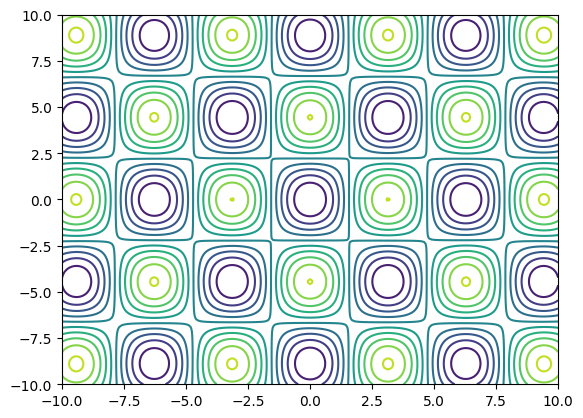

In [3]:
# Plot contour plot in the search space (xmin=-10, ymin=-10), (xmin=10, ymin=10)
N=201
limit=10
xx = np.linspace(-limit, limit, N)
yy = np.linspace(-limit, limit, N)
X = np.repeat(xx,N).reshape(N,N)
Y = np.tile(yy,N).reshape(N,N)
#
x = np.column_stack((X.flatten(),Y.flatten())).T
Z = Griewangk(x).reshape(N,N)
#
plt.contour(X,Y,Z, levels=10)

In [4]:
# Find the location of the minimum value in Z
print(Z.shape)
idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
print(idx, '(',X[idx], ', ', Y[idx],')', Z[idx])
print('Therefore global minimum is at (0.0, 0.0)')

(201, 201)
(100, 100) ( 0.0 ,  0.0 ) 0.0
Therefore global minimum is at (0.0, 0.0)


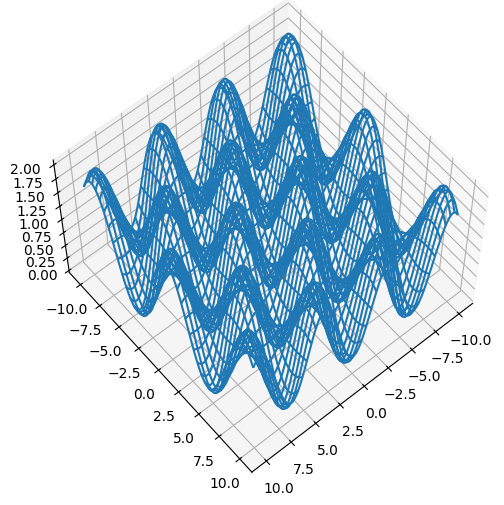

In [5]:
# Plot a 3D wireframe of the objective function
#
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, cmap=cm.jet)
#ax.plot_wireframe(X, Y, np.log(Z), rstride=2, cstride=2)
#ax.view_init(0, 90) # elevation, azimuth
ax.view_init(60, 50) # elevation, azimuth


---
## Q1

Modify the gradient descent algorithm with the derivate of the $G(\mathbf{x})$ and starting from a random position in the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$, find a minimiser of $G(\mathbf{x})$. 

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

**Calculating the Gradient**

In [6]:
def grad_Griewangk(x):
    """
    Calculate the gradient of the Griewangk function.
    x: numpy array of shape (2,)
    returns: gradient vector of shape (2,)
    """
    grad_x = x[0]/2000 + np.sin(x[0])*np.cos(0.5*x[1]*np.sqrt(2))
    grad_y = x[1]/2000 + np.cos(x[0])*np.sin(0.5*x[1]*np.sqrt(2))*0.5*np.sqrt(2)
    return np.array([grad_x, grad_y])

**Gradient Descent Algorithm**

In [7]:
def gradient_descent(x_init, alpha=0.1, max_iter=100, tol=1e-6):
    """
    Gradient Descent optimization for Griewangk function.
    
    Parameters:
    x_init: initial position (numpy array of shape (2,))
    alpha: learning rate
    max_iter: maximum number of iterations
    tol: tolerance for convergence
    
    Returns:
    x_history: history of positions
    f_history: history of function values
    """
    x = x_init.copy()
    x_history = np.zeros((max_iter+1, 2))
    f_history = np.zeros(max_iter+1)
    
    # Store initial position and value
    x_history[0] = x
    f_history[0] = Griewangk(x)
    
    for i in range(max_iter):
        # Calculate gradient
        gradient = grad_Griewangk(x)
        
        # Update position
        x = x - alpha * gradient
        
        # Store current position and value
        x_history[i+1] = x
        f_history[i+1] = Griewangk(x)
        
        # Check convergence
        if np.linalg.norm(gradient) < tol:
            # Trim history arrays to actual iterations used
            x_history = x_history[:i+2]
            f_history = f_history[:i+2]
            break
            
    return x_history, f_history

**Executing the Algorithm for 100 Iterations**

In [8]:
# Set parameters
n_runs = 100
max_iter = 100
alpha = 0.1
limit = 10  # Search space limits

# Arrays to store results
all_f_histories = []
final_values = []

# Run gradient descent 100 times
for run in range(n_runs):
    # Random initial position within the search space
    x_init = np.random.uniform(-limit, limit, 2)
    
    # Run gradient descent
    _, f_history = gradient_descent(x_init, alpha=alpha, max_iter=max_iter)
    
    # Store results
    all_f_histories.append(f_history)
    final_values.append(f_history[-1])

**Plotting Convergence and Standard Deviation**

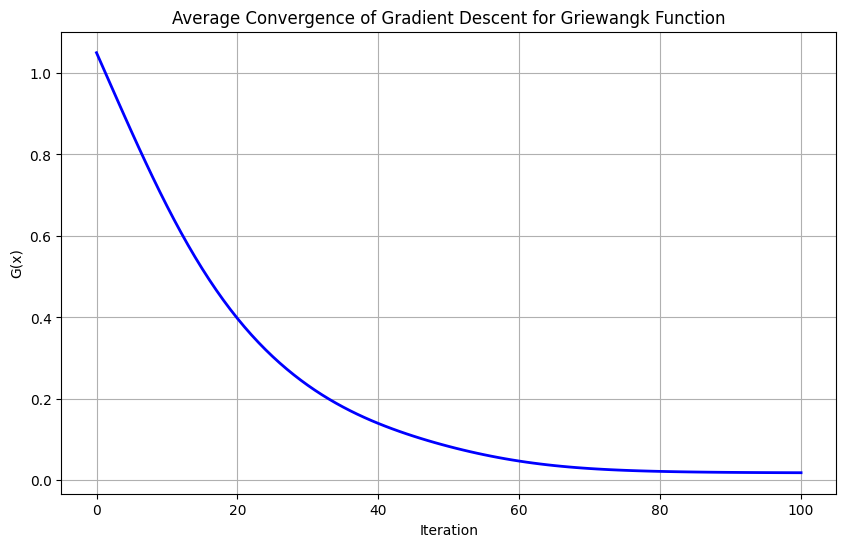

Mean final value: 0.018757
Standard deviation of final values: 0.012634


In [9]:
# Calculate statistics
max_length = max(len(hist) for hist in all_f_histories)
padded_histories = []

# Pad shorter histories with their final values
for hist in all_f_histories:
    padded = np.zeros(max_length)
    padded[:len(hist)] = hist
    if len(hist) < max_length:
        padded[len(hist):] = hist[-1]
    padded_histories.append(padded)

# Convert to numpy array for calculations
f_histories_array = np.array(padded_histories)

# Calculate mean and standard deviation
mean_f_history = np.mean(f_histories_array, axis=0)
std_final = np.std(final_values)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mean_f_history, 'b-', linewidth=2)
plt.title('Average Convergence of Gradient Descent for Griewangk Function')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.show()

# Print statistics
print(f"Mean final value: {np.mean(final_values):.6f}")
print(f"Standard deviation of final values: {std_final:.6f}")

---

## Q2

Implement a random search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

**Implementing Random Search Algorithm**

In [10]:
def random_search(max_iter=100, limit=10):
    """
    Random Search optimization for Griewangk function.
    
    Parameters:
    max_iter: maximum number of iterations
    limit: boundary of the search space [-limit, limit]
    
    Returns:
    x_best: best position found
    f_history: history of best function values
    """
    # Initialize best position and value
    x_best = np.random.uniform(-limit, limit, 2)
    f_best = Griewangk(x_best)
    
    # Initialize history arrays
    f_history = np.zeros(max_iter + 1)
    f_history[0] = f_best
    
    for i in range(max_iter):
        # Generate a random point in the search space
        x_candidate = np.random.uniform(-limit, limit, 2)
        f_candidate = Griewangk(x_candidate)
        
        # Update if better point is found
        if f_candidate < f_best:
            x_best = x_candidate.copy()
            f_best = f_candidate
        
        # Store current best value
        f_history[i + 1] = f_best
    
    return x_best, f_history

**Executing the Algorithm for 100 Iterations**

In [11]:
# Set parameters
n_runs = 100
max_iter = 100
limit = 10  # Search space limits

# Arrays to store results
all_f_histories = []
final_values = []

# Run random search 100 times
for run in range(n_runs):
    # Run random search
    _, f_history = random_search(max_iter=max_iter, limit=limit)
    
    # Store results
    all_f_histories.append(f_history)
    final_values.append(f_history[-1])

**Plotting Convergence and Standard Deviation**

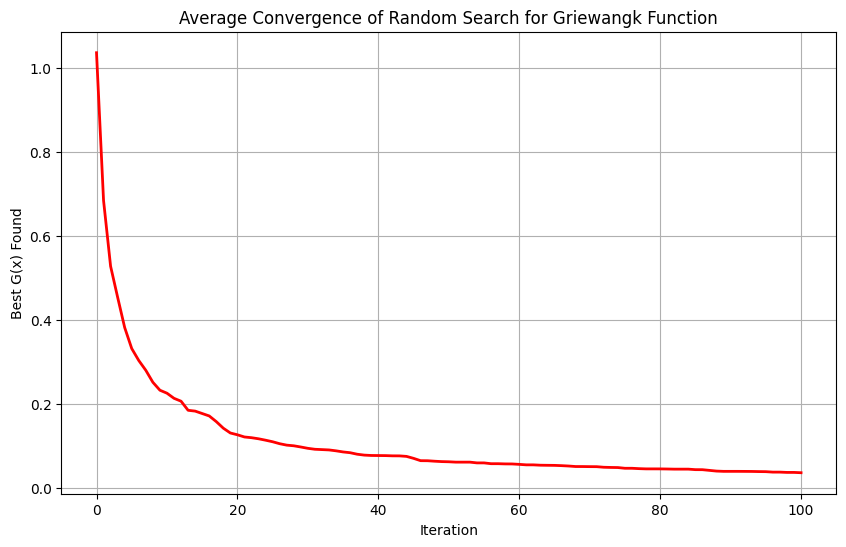

Mean final value: 0.037101
Standard deviation of final values: 0.022536


In [12]:
# Calculate statistics
f_histories_array = np.array(all_f_histories)
mean_f_history = np.mean(f_histories_array, axis=0)
std_final = np.std(final_values)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mean_f_history, 'r-', linewidth=2)
plt.title('Average Convergence of Random Search for Griewangk Function')
plt.xlabel('Iteration')
plt.ylabel('Best G(x) Found')
plt.grid(True)
plt.show()

# Print statistics
print(f"Mean final value: {np.mean(final_values):.6f}")
print(f"Standard deviation of final values: {std_final:.6f}")

---

## Q3

Implement a two step approach:

1. In the first step carry out a random search and find minimiser $\mathbf{x}_{initial}^*$, within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.
2. In the second step use gradient descent and starting from $\mathbf{x}_{initial}^*$ find minimiser $\mathbf{x}_{final}^*$  within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [10 marks]



**Implementing a Random Search to Find Initial Minimiser and Gradient Descent to Find Final Minimiser**

In [13]:
def random_search_then_gradient_descent(rs_iterations=100, gd_iterations=100, limit=10, alpha=0.1):
    """
    Two-step optimization approach:
    1. Random Search to find an initial minimizer (x_initial*)
    2. Gradient Descent starting from that point to find x_final*
    
    Parameters:
    rs_iterations: iterations for random search phase
    gd_iterations: iterations for gradient descent phase
    limit: boundary of the search space [-limit, limit]
    alpha: learning rate for gradient descent
    
    Returns:
    x_final: final position found
    f_history: combined history of function values
    """
    # Step 1: Random Search
    x_initial, f_history_rs = random_search(max_iter=rs_iterations, limit=limit)
    
    # Step 2: Gradient Descent starting from the result of random search
    _, f_history_gd = gradient_descent(x_initial, alpha=alpha, max_iter=gd_iterations)
    
    # Combine histories
    f_history = np.concatenate([f_history_rs, f_history_gd[1:]])
    
    return x_initial, f_history

**Executing the Algorithm for 100 Iterations**

In [14]:
# Set parameters
n_runs = 100
rs_iterations = 100  # Full random search iterations
gd_iterations = 100  # Full gradient descent iterations
alpha = 0.1
limit = 10

# Arrays to store results
all_f_histories = []
final_values = []

# Run combined approach 100 times
for run in range(n_runs):
    # Run two-step approach
    _, f_history = random_search_then_gradient_descent(
        rs_iterations=rs_iterations, 
        gd_iterations=gd_iterations, 
        limit=limit,
        alpha=alpha
    )
    
    # Store results
    all_f_histories.append(f_history)
    final_values.append(f_history[-1])

# Calculate statistics
# Handle variable-length histories
max_length = max(len(hist) for hist in all_f_histories)
padded_histories = []

# Pad shorter histories with their final values
for hist in all_f_histories:
    padded = np.zeros(max_length)
    padded[:len(hist)] = hist
    if len(hist) < max_length:
        padded[len(hist):] = hist[-1]
    padded_histories.append(padded)



**Plotting Convergence and Standard Deviation**

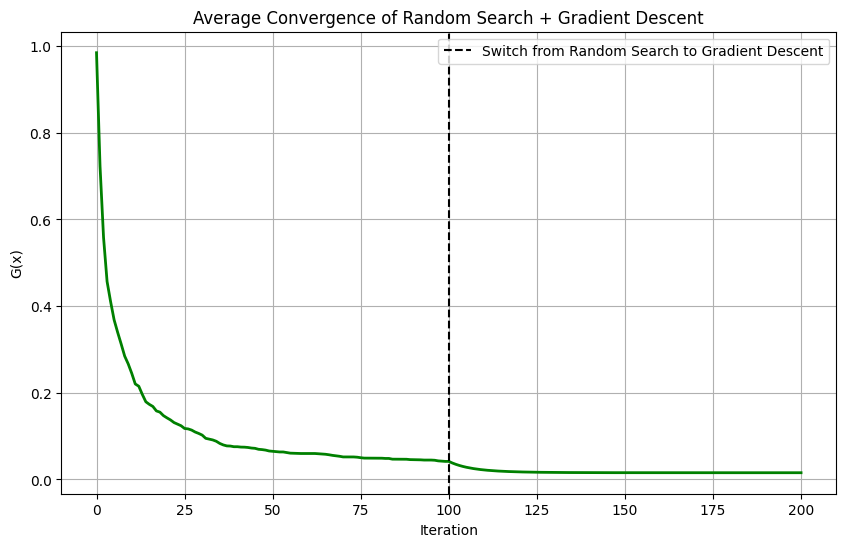

Mean final value: 0.015435
Standard deviation of final values: 0.009786


In [15]:
# Convert to numpy array for calculations
f_histories_array = np.array(padded_histories)

# Calculate mean and standard deviation
mean_f_history = np.mean(f_histories_array, axis=0)
std_final = np.std(final_values)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mean_f_history, 'g-', linewidth=2)
plt.axvline(x=rs_iterations, color='k', linestyle='--', 
           label='Switch from Random Search to Gradient Descent')
plt.title('Average Convergence of Random Search + Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.legend()
plt.show()

# Print statistics
print(f"Mean final value: {np.mean(final_values):.6f}")
print(f"Standard deviation of final values: {std_final:.6f}")

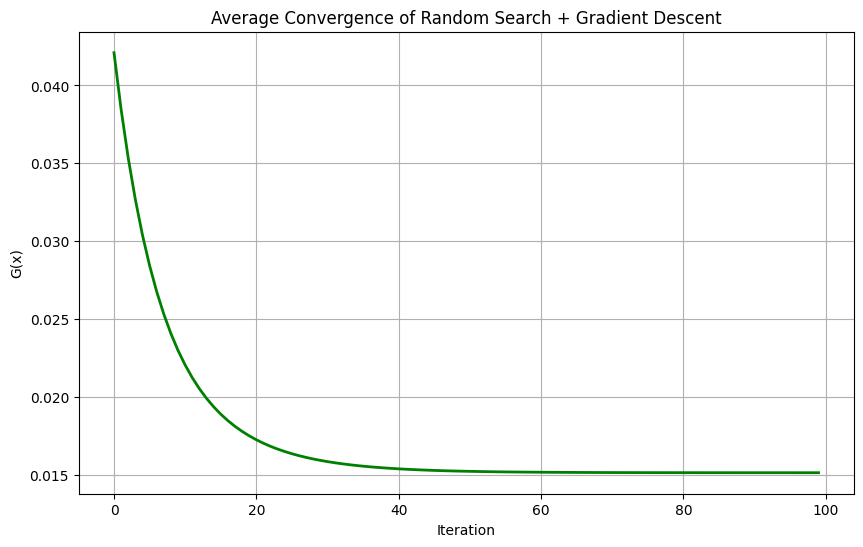

Mean final value: 0.015139
Standard deviation of final values: 0.010273


In [16]:
# Two-step optimization process
num_runs = 100
num_iterations = 100
learning_rate = 0.1
G_values_all_runs = np.zeros((num_runs, num_iterations))

for run in range(num_runs):
    # Step 1: Random Search to get initial point
    x_best, _ = random_search(max_iter=100, limit=10)  # Using the existing random_search function
    x = x_best  # Initial point for gradient descent
    
    # Step 2: Gradient Descent from x_initial
    _, f_history = gradient_descent(x, alpha=learning_rate, max_iter=num_iterations)
    G_values_all_runs[run, :] = f_history[:num_iterations]


# Calculate mean and standard deviation
mean_G_values = np.mean(G_values_all_runs, axis=0)
std_final = np.std(G_values_all_runs[:, -1])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mean_G_values, 'g-', linewidth=2)
plt.title('Average Convergence of Random Search + Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.show()

# Print statistics
print(f"Mean final value: {np.mean(G_values_all_runs[:, -1]):.6f}")
print(f"Standard deviation of final values: {std_final:.6f}")

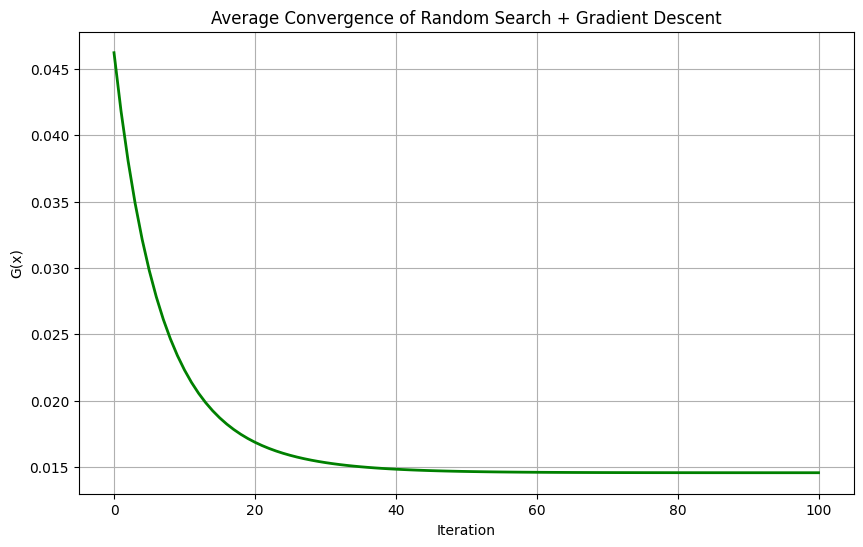

Mean final value: 0.014572
Standard deviation of final values: 0.009713


In [17]:
def random_search_proper(max_iter=100, limit=10):
    """Performs proper random search to find best initial point."""
    x_best = np.random.uniform(-limit, limit, 2)
    f_best = Griewangk(x_best)
    
    for _ in range(max_iter):
        x_candidate = np.random.uniform(-limit, limit, 2)
        f_candidate = Griewangk(x_candidate)
        if f_candidate < f_best:
            x_best = x_candidate
            f_best = f_candidate
            
    return x_best, f_best


def gradient_descent(x0, alpha=0.1, max_iter=100):
    """Performs gradient descent without early stopping (no tolerance)."""
    x = x0.copy()
    f_history = [Griewangk(x)]
    
    for _ in range(max_iter):
        grad = grad_Griewangk(x)
        x -= alpha * grad
        f_history.append(Griewangk(x))
        
    return x, f_history

n_runs = 100
max_iter = 100
limit = 10
alpha = 0.1

# Store histories and final values
all_f_histories = []
final_values = []

for run in range(n_runs):
    x_init, _ = random_search_proper(max_iter=100, limit=limit)  # ✅ Now it's different every time
    _, f_history = gradient_descent(x0=x_init, alpha=alpha, max_iter=max_iter)
    all_f_histories.append(f_history)
    final_values.append(f_history[-1])

# Normalize lengths (in case some runs converge early)
max_length = max(len(hist) for hist in all_f_histories)
padded_histories = []

for hist in all_f_histories:
    padded = np.zeros(max_length)
    padded[:len(hist)] = hist
    if len(hist) < max_length:
        padded[len(hist):] = hist[-1]
    padded_histories.append(padded)

# Convert to numpy array
f_histories_array = np.array(padded_histories)

# Compute mean and standard deviation
mean_f_history = np.mean(f_histories_array, axis=0)
std_final = np.std(final_values)

# Plot average convergence
plt.figure(figsize=(10, 6))
plt.plot(mean_f_history, 'g-', linewidth=2)
plt.title('Average Convergence of Random Search + Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.show()

# Print final stats
print(f"Mean final value: {np.mean(final_values):.6f}")
print(f"Standard deviation of final values: {std_final:.6f}")

---

## Q4 

Implement a simulated annealing search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [30 marks]

In [18]:
def simulated_annealing(max_iter=100, limit=10, T_initial=10.0, T_final=0.1):
    """
    Simulated Annealing optimization for Griewangk function.
    
    Parameters:
    max_iter: maximum number of iterations
    limit: boundary of the search space [-limit, limit]
    T_initial: initial temperature
    T_final: final temperature
    
    Returns:
    x_best: best position found
    f_history: history of best function values
    """
    # Initialize current position and value
    x_current = np.random.uniform(-limit, limit, 2)
    f_current = Griewangk(x_current)
    
    # Initialize best position and value
    x_best = x_current.copy()
    f_best = f_current
    
    # Initialize history arrays
    f_history = np.zeros(max_iter + 1)
    f_history[0] = f_best
    
    # Calculate cooling rate
    cooling_rate = (T_final / T_initial) ** (1.0 / max_iter)
    
    # Set current temperature
    T = T_initial
    
    for i in range(max_iter):
        # Generate a neighboring solution
        # The step size decreases with temperature
        step_size = 0.5 * T / T_initial * limit
        neighbor = x_current + np.random.uniform(-step_size, step_size, 2)
        
        # Ensure neighbor is within the search space
        neighbor = np.clip(neighbor, -limit, limit)
        
        # Calculate objective function value for neighbor
        f_neighbor = Griewangk(neighbor)
        
        # Calculate energy difference
        delta_E = f_neighbor - f_current
        
        # Accept the new solution if it's better or with a probability if it's worse
        if delta_E < 0 or np.random.random() < np.exp(-delta_E / T):
            x_current = neighbor.copy()
            f_current = f_neighbor
            
            # Update best solution if necessary
            if f_current < f_best:
                x_best = x_current.copy()
                f_best = f_current
        
        # Store current best value
        f_history[i + 1] = f_best
        
        # Decrease temperature
        T *= cooling_rate
    
    return x_best, f_history

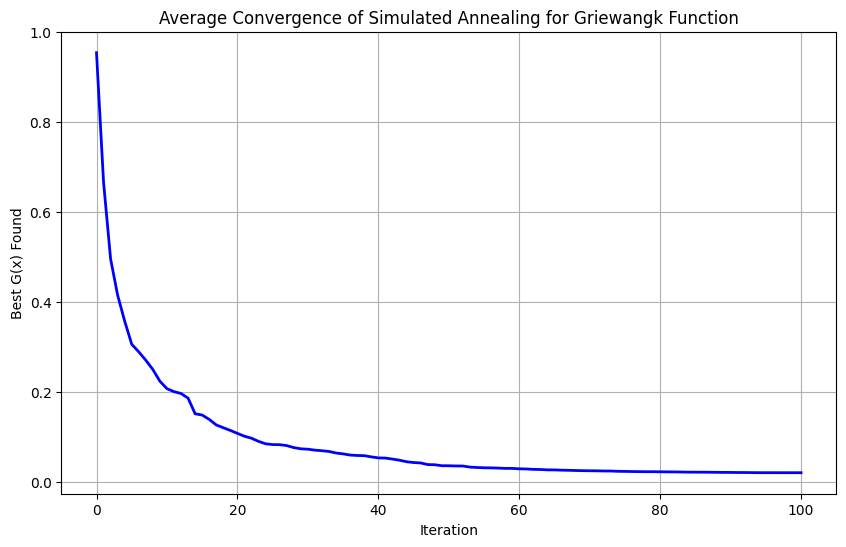

Mean final value: 0.020765
Standard deviation of final values: 0.012943


In [19]:
# Set parameters
n_runs = 100
max_iter = 100
limit = 10
T_initial = 1.0
T_final = 0.01

# Arrays to store results
all_f_histories = []
final_values = []

# Run simulated annealing 100 times
for run in range(n_runs):
    # Run simulated annealing
    _, f_history = simulated_annealing(
        max_iter=max_iter, 
        limit=limit,
        T_initial=T_initial, 
        T_final=T_final
    )
    
    # Store results
    all_f_histories.append(f_history)
    final_values.append(f_history[-1])

# Calculate statistics
f_histories_array = np.array(all_f_histories)
mean_f_history = np.mean(f_histories_array, axis=0)
std_final = np.std(final_values)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mean_f_history, 'blue', linewidth=2)
plt.title('Average Convergence of Simulated Annealing for Griewangk Function')
plt.xlabel('Iteration')
plt.ylabel('Best G(x) Found')
plt.grid(True)
plt.show()

# Print statistics
print(f"Mean final value: {np.mean(final_values):.6f}")
print(f"Standard deviation of final values: {std_final:.6f}")

---

## Q5

Superimpose all plots from all four optimisation methods and compare the algorithms in terms of rate of convergence, effectiveness and robustness.

### [30 marks]